
# **Outliers**


**Learning objectives:**

This chapter teaches you the fundamentals of outliers. After completing this chapter, you will be able to do the following:


1. State the key points about the outliers.

2. Understand the difference between univariate outlier detection techniques and multivariate outlier detection techniques.

3.  Recognize the causes of outliers.
4.  Visualize the effect of an outlier in a dataset mean, median, etc. through the code.


**Technical Requirements**

Install a jupyter-notebook along with the pandas library. To understand this topic, you should be familiar with the pandas library.



##  Introduction to outliers

---

###  What are Outliers?

Outliers are values in a dataset that are **very different from the rest**. They don’t follow the usual pattern of the data.

Think of it like this:
> Imagine most students in a class are between 18 to 22 years old. If someone is 60 years old, that would be an outlier — because it’s very unusual in that context.

Outliers can be:
- **Much higher or lower** than other data points
- Caused by **mistakes** (like typing errors)
- Or sometimes, they are **real and important** (like detecting fraud or rare diseases)

####  Simple Example:

```python
[70, 72, 68, 71, 69, 73, 95]

Suppose you have the following student test scores:
Most numbers are around 70. But 95 looks far off — it might be an outlier.




---


###  Why Outliers Matter in Data Science & Machine Learning

Outliers are important because they can affect how we understand and use our data.

#### 1.  They Can Change Summary Statistics

Outliers can pull your **mean (average)** and **standard deviation** in the wrong direction.  
This means your analysis may not represent the data correctly.

> Example:  
> If most students score between 60 and 70, and one student scores 10, the average score goes down — even though most students did well.

---

#### 2.  They Can Confuse Machine Learning Models

Some machine learning models assume the data is smooth and well-behaved. Outliers can confuse them.

**Especially affected models:**
- **Linear Regression:** Outliers can pull the line too far in one direction.
- **K-Nearest Neighbors (KNN):** Distance gets messed up by far-off values.
- **Clustering (like K-Means):** Groups may form around the wrong points.

---

#### 3.  They Affect Scaling

When we scale features using methods like:
- **Standardization (Z-score)**
- **Normalization (Min-Max)**

Outliers can stretch the range, and normal data points may all squeeze together.

---

#### 4.  Sometimes, Outliers Are Signals

Not all outliers are bad. Some are actually very useful!

Examples:
- A huge money transfer → could be **fraud**
- A very high body temperature → might be **a health issue**
- A rare pattern in data → could be **something new to discover**

So instead of always removing outliers, we should ask:
>  Is this outlier a mistake or something meaningful?

---

####  In Summary:
- Outliers can **change results**, **confuse models**, and **distort scaling**.
- But sometimes they reveal **important insights**.
- That’s why it’s important to **detect, understand, and handle them properly**.



##  Types of Outliers



---

#### 1️. Global Outliers (Also called Point Outliers)

These are the most common kind.

A **global outlier** is a data point that is **far away from the rest of the data**, no matter what the situation is.

>  Think of a student scoring 5 out of 100 in an exam where most others scored between 60 and 80. That score sticks out clearly — it’s a global outlier.

These are easy to detect using:
- Z-score
- IQR method
- Box plots

---

#### 2️. Contextual Outliers (Conditional Outliers)

These are outliers **only in a specific context**. The same value might be normal in one situation and weird in another.

>  Example:  
> A temperature of 30°C is normal in summer, but strange in winter.  
> So if it’s winter and the temperature is 30°C, it’s a **contextual outlier**.

These are harder to detect because we need to consider:
- **Context/conditions** (like time, location)
- **Multiple features** to judge if it’s unusual

Used often in:
- Time-series data
- Weather data
- Stock prices

---

#### 3️. Collective Outliers

These are **groups of data points** that are normal by themselves but **unusual as a group**.

>  Example:  
> In a credit card dataset, one or two small purchases are normal.  
> But if someone makes 50 small purchases in 10 minutes, **the pattern** is unusual — that’s a **collective outlier**.

Used in:
- Anomaly detection
- Fraud detection
- Network intrusion detection

We usually need **sequence models** or **pattern-based techniques** (like LSTM, autoencoders) to catch these.

---

###  Causes of Outliers

Let’s now look at **why outliers happen** in the first place.

---

####  1. Data Entry or Human Errors

- Typing mistakes
- Wrong measurement units (like cm instead of mm)
- Copy-paste errors

> Example: Entering 1000 instead of 100

---

####  2. Measurement Errors

- Faulty sensors (in IoT devices)
- Malfunctioning equipment
- Calibration errors

> Example: A broken thermometer giving wrong readings

---

####  3. Experimental Conditions

- Something went wrong during a test or experiment
- Uncontrolled environment caused odd readings

> Example: Wind affecting a scale during a weight measurement

---

####  4. Natural Variability

- In some fields (like health, finance), extreme values **do exist naturally**
- People have different body temperatures, spending habits, etc.

> These are **real outliers**, not errors

---

####  5. Fraud or Rare Events

- Sudden spikes or drops in data may point to **fraud, cyber attacks, or faults**
- These outliers are **useful** and should be **analyzed carefully**, not deleted blindly

> Example: A bank account suddenly withdrawing $10,000 after months of low activity



----
# Detecting Outliers
## Detecting Outliers (Univariate)
   - Using Visualization
     - Box Plot
     - Histogram
     - Distribution Plot
   - Using Statistical Methods
     - IQR (Interquartile Range)
     - Z-score
     - Modified Z-score

##  Detecting Outliers (Multivariate)
   - Mahalanobis Distance
   - DBSCAN
   - Isolation Forest
   - PCA for Outlier Detection


----
## Outlier Handling Techniques

So now that we know how to **identify outliers**, what do we do with them?

Not all outliers should be removed. Some are **mistakes**, but some might be **important insights** (like fraud, rare diseases, etc.).

Outlier handling depends on:
- Your domain knowledge
- The type of model you’re using
- Whether the outlier is meaningful or not

Below are the most common techniques to handle outliers:

---

###  1. Trimming (Removing Outliers)

This means **removing** the outlier values completely from the dataset.

>  Useful when outliers are clearly errors or extreme and not useful.



In [1]:
import numpy as np

data = [10, 12, 11, 13, 90]  # 90 is an outlier
filtered_data = [x for x in data if x < 50]
print(filtered_data)  # [10, 12, 11, 13]

[10, 12, 11, 13]


Pros:
* Simple and quick

* Cleans the data for some models (like linear regression)

Cons:
* You may lose important data

* Not suitable for small datasets

----
## 2. Imputation (Replacing Outliers with Mean/Median/Mode)

Instead of deleting the outlier, we replace it with a value that makes more sense (like the mean, median, or mode).

 Median is often better than mean because it’s less affected by outliers.

In [3]:
import pandas as pd

df = pd.DataFrame({'score': [10, 12, 11, 13, 90]})
print(df)


   score
0     10
1     12
2     11
3     13
4     90


In [4]:
median_value = df['score'].median()
df.loc[df['score'] > 50, 'score'] = median_value
print(df)

   score
0     10
1     12
2     11
3     13
4     12


Pros:
* Keeps the dataset size same

* Easy to implement

Cons:
* You may lose true variance in the data

* Works only when outliers are few and replaceable

---
## 3. Capping (Winsorization)
Winsorization means you cap the outliers to a fixed percentile — like changing values above the 95th percentile to exactly the 95th percentile value.

It’s like telling your outliers: “Okay, you’ve gone too far — now come back in range!”

Original Data: [10, 12, 11, 13, 90]
Winsorized Data: [np.int64(10), np.int64(12), np.int64(11), np.int64(13), np.int64(90)]
Mean - Original: 27.2
Mean - Winsorized: 27.2
Median - Original: 12.0
Median - Winsorized: 12.0


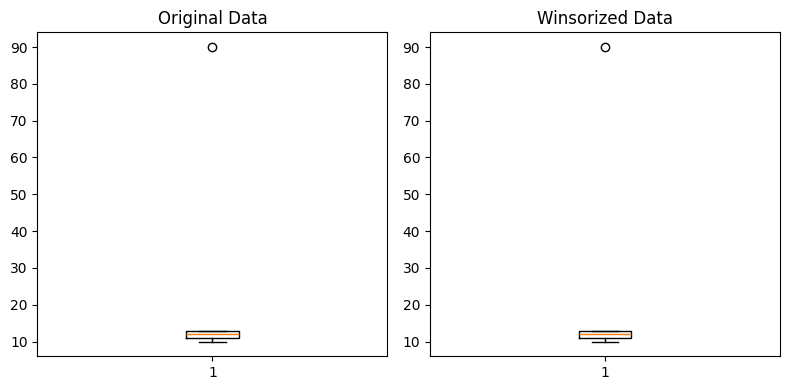

In [11]:
import pandas as pd
import scipy.stats as stats
import numpy as np  # Importing numpy to handle array operations
import matplotlib.pyplot as plt

# Original dataset with an outlier
data = [10, 12, 11, 13, 90]

# Convert the list to a numpy array before applying Winsorization
data_array = np.array(data)

# Apply Winsorization: cap the bottom 5% and top 5% values
capped_data = stats.mstats.winsorize(data_array, limits=[0.05, 0.05])

# Convert masked array to list for easier processing
capped_data_list = list(capped_data)

# Calculate and display mean and median before and after Winsorization
print("Original Data:", data)
print("Winsorized Data:", capped_data_list)
print("Mean - Original:", round(pd.Series(data).mean(), 2))
print("Mean - Winsorized:", round(pd.Series(capped_data_list).mean(), 2))
print("Median - Original:", pd.Series(data).median())
print("Median - Winsorized:", pd.Series(capped_data_list).median())

# Plotting the original and Winsorized data
plt.figure(figsize=(8, 4))

# Plot original data
plt.subplot(1, 2, 1)
plt.boxplot(data)
plt.title("Original Data")

# Plot Winsorized data
plt.subplot(1, 2, 2)
plt.boxplot(capped_data_list)
plt.title("Winsorized Data")

plt.tight_layout()
plt.show()


Pros:
* Keeps all data points

* Reduces outlier influence while keeping structure

Cons:
* You lose some true values

* Percentile thresholds can feel arbitrary



---
## 4. Transformation (e.g., Log, Box-Cox)
Transforming the data can shrink the effect of outliers.

Common transformations:
* Log transformation

* Square root

* Box-Cox (advanced)

These make the data more normal (Gaussian) and help reduce skewness.

In [12]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'salary': [1000, 1200, 1300, 1500, 10000]})
df['log_salary'] = np.log(df['salary'])  # log transformation
print(df)


   salary  log_salary
0    1000    6.907755
1    1200    7.090077
2    1300    7.170120
3    1500    7.313220
4   10000    9.210340


Pros:
* Keeps all data

* Makes data better for modeling (especially linear models)

Cons:
* Can’t apply to negative or zero values (log)

* Interpretation becomes harder (especially for non-tech teams)